# Explanation of the variations of the Borrower APR
## by Nour El Hedi Zrelli



## Investigation Overview


In this investigation, I am looking at the Borrower APR distribution and the main features affecting its variation which are the loan original amount and the employment status.



## Dataset Overview

The original dataset contains informations about 113937 loans with 81 variables on each loan such as loan amount, borrower rate ( interest rate ), current loan status, borrower income, and many others.
In this ivestigation, I will be working with just the following variables : the Borrower APR, the loan original amount and the employment status. I will also remove 327 rows corresponding to 327 people having a stated monthly income over 30k which I considered as outliers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Removing the outliers
df=df[df['StatedMonthlyIncome']<30000]
# Only consider features of interest
features = ['BorrowerAPR','LoanOriginalAmount','EmploymentStatus']
df1=df[features]
# Change the type of the employment status variable
emp = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
orderedvar = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp)
df1['EmploymentStatus'] = df1['EmploymentStatus'].astype(orderedvar)


## The distribution of the Borrower APR

The distribution of the borrower APR looks multimodal.There are many peaks on different intervals. There are few loans with close to 0 APR and few loans with APR over than 0.4.

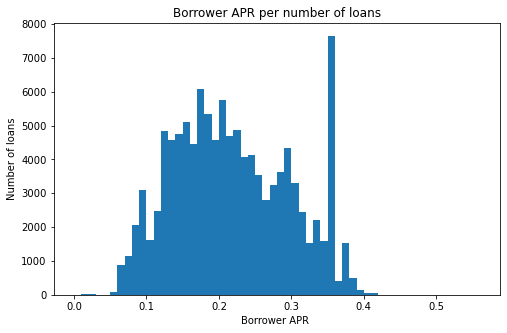

In [3]:
plt.figure(figsize=[8,5])
bins=np.arange(0,df.BorrowerAPR.max()+0.05,0.01)
plt.hist(data=df,x='BorrowerAPR',bins=bins)
plt.xlabel('Borrower APR ')
plt.ylabel('Number of loans')
plt.title('Borrower APR per number of loans');

## The loan original amount distribution

There are important peaks around the 5k, 10k, 15k,20k,25k. 

Loans are mostly multiples of 1k. 


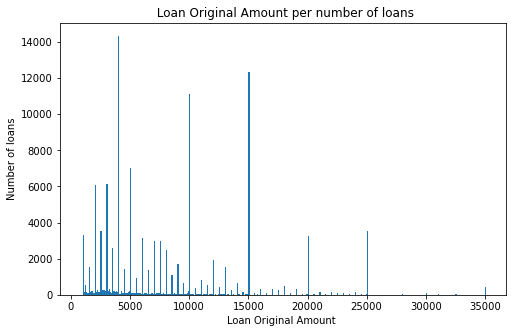

In [4]:
plt.figure(figsize=[8,5])
bins=np.arange(800,df1.LoanOriginalAmount.max()+200,100)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins)
plt.xlabel('Loan Original Amount ')
plt.ylabel('Number of loans')
plt.title(' Loan Original Amount per number of loans');

## The Borrower APR and the loan original amount

Looking at this bivariate relationship between the loan original amount and the BorrowerAPR, the loans with an amount less than 25k seem to have a borrower APR between 0.08 and 0.4, for loans with an amount over 25k the APR is between 0.1 and 0.2.

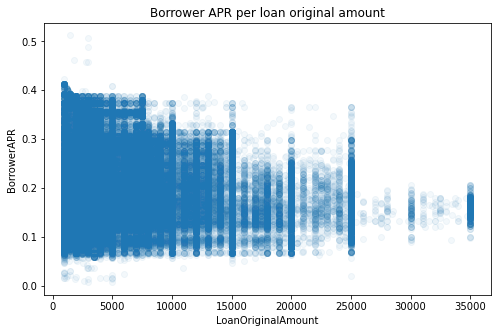

In [5]:
plt.figure(figsize=[8,5])
plt.scatter(data = df1 , x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha=1/20) 
#alpha is added to add transparency since there were an overplotting
plt.ylabel('BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.title('Borrower APR per loan original amount');

## The Borrower APR and the employment statuts

The boxplots show that for the non emlpoyed people, the APR is high : 75% of unemployed people gets an APR over 0.2. 

For the employed and retired people, the APR seems balanced : 50% of people gets an APR over 0.2.

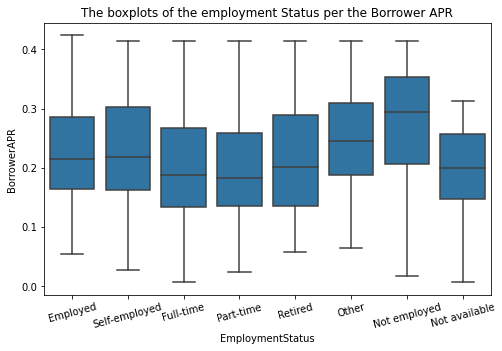

In [6]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df1, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.title('The boxplots of the employment Status per the Borrower APR');

In [7]:
!jupyter nbconvert Part_II_Loans_Data.ipynb --to slides --post serve --no-input --no-prompt

^C
